In [1]:
from sklearn.datasets import load_boston
bostan=load_boston()

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
bostan1=pd.DataFrame(bostan.data,columns=bostan.feature_names)

In [5]:
bostan1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
bostan1["MEDV"]=bostan.target

In [7]:
bostan1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

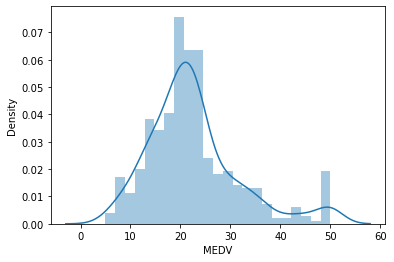

In [11]:
sns.distplot(bostan1.MEDV)

<AxesSubplot:>

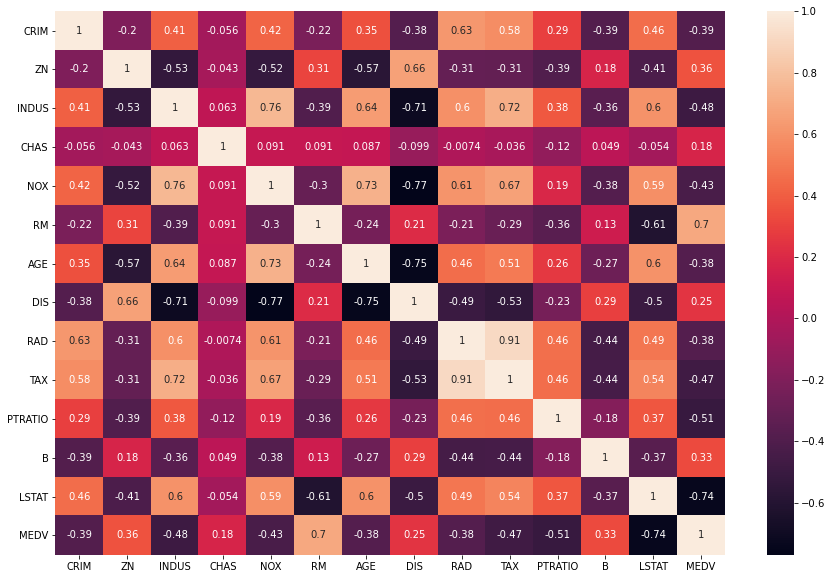

In [12]:
plt.figure(figsize=(15,10))
corr=bostan1.corr()
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

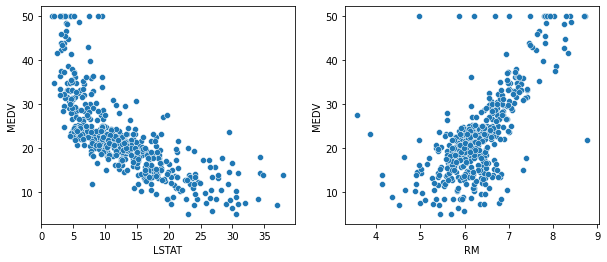

In [14]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.scatterplot(bostan1.LSTAT,bostan1.MEDV)
plt.subplot(1,2,2)
sns.scatterplot(bostan1.RM,bostan1.MEDV)

In [21]:
x=bostan1[["RM","LSTAT"]]
y=bostan1.MEDV

In [18]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [24]:
lm=LinearRegression()

In [25]:
lm.fit(x_train,y_train)

LinearRegression()

In [26]:
lm.coef_,lm.intercept_

(array([ 5.46509877, -0.63249856]), -3.84117707900489)

In [27]:
y_pred=lm.predict(x_train)

In [28]:
rmse=np.sqrt(mean_squared_error(y_train,y_pred))
r=r2_score(y_train,y_pred)
print(rmse,r)

5.512880843371696 0.6501592679428922


In [29]:
ypred=lm.predict(x_test)

In [30]:
rmse=np.sqrt(mean_squared_error(y_test,ypred))
r=r2_score(y_test,ypred)
print(rmse,r)

5.5895698047151745 0.5739577415025857


In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
def poly(degree,x_train,x_test,y_train,y_test):
    poly_reg=PolynomialFeatures(degree=degree)
    x_train_ploly=poly_reg.fit_transform(x_train)
    prm=LinearRegression()
    prm.fit(x_train_ploly,y_train)
    
    y_pred=prm.predict(x_train_ploly)
    r_train=r2_score(y_train,y_pred)
    rmse_train=np.sqrt(mean_squared_error(y_train,y_pred))
    print("r2 score and rmse")
    print(r_train,rmse_train)
    
    x_test_ploly=poly_reg.fit_transform(x_test)
    y_pred_test=prm.predict(x_test_ploly)
    
    r_test=r2_score(y_test,y_pred_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
    print("for test data")
    print(r_test,rmse_test)
    
    
    

In [34]:
poly(2,x_train,x_test,y_train,y_test)

r2 score and rmse
0.7576154344716141 4.588765873742464
for test data
0.7486318454509486 4.293457550635697
